# Importing the required Libraries

In [248]:
# Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Operating System libraries
import os 
import sys
import subprocess 
import zipfile 

# # Date and time libraries
# import time
# import datetime

# Scientific Python libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import itertools
# from itertools import chain, combinations
import statsmodels.stats.stattools as stools
import copy
import math

# Scientific Python libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline


# Scraping and text libraries
import requests 
import re 

# Machine Learning #############################################################

# Sklearn metrics
from sklearn import metrics
from sklearn.metrics import r2_score

# K-fold Cross Validation
import sklearn
from sklearn.model_selection import GridSearchCV

# Regression metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import ShuffleSplit


# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

# Regressions --------------------------------------------------------
## Multiple linear regression
from sklearn.linear_model import LinearRegression

## Stepwise variable selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

## Ridge Regression
from sklearn.linear_model import Ridge

## Lasso Regression
from sklearn.linear_model import Lasso

## Elastic net Regression
from sklearn.linear_model import ElasticNet

## Principal Component Regression (PCR)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale


## KNN (K Nearest Neighbors)
from sklearn.neighbors import KNeighborsRegressor

## Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


## Boosting
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor

## XG Boosting
try: 
    from xgboost import XGBRegressor
except:
    !pip install xgboost
    from xgboost import XGBRegressor

## Neural Networks
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import *
from inspect import signature
from sklearn.neural_network import MLPRegressor

## Random forest
from sklearn.ensemble import RandomForestRegressor

# Dataset

In [249]:
# Import the dataset
df=pd.read_csv("/Users/sajjad/Documents/2-Spring 2022 BGSU/Data Mining/Project Data Mining/cardio_df.csv")
display(df.head(8)) # show first 8 rows

display(df.tail(8)) # show last 8 rows

# a summary of dataset 
df.info() 
df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
# check the null values & duplicated values
display('Null Values :',df.isnull().sum())

display('copy Values :',df.duplicated().sum())

'Null Values :'

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

'copy Values :'

0

**As indicated above , we don't have any null or duplicated values.**

In [251]:
# drop the first column
df=df.drop(df.columns[[0]],axis=1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<ipython-input-252-43987990e2f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cardio[df.cardio==0]="no"


'Number of No in response variable :'

35021

'Number of Yes in response variable:'

34979

Response variable is Balanced


(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

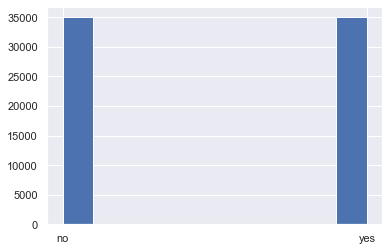

In [252]:
# change the response variable to factor ( 0 = no , 1= yes)
df.cardio[df.cardio==0]="no"
df.cardio[df.cardio==1]="yes"
df

display("Number of No in response variable :",df.cardio[df.cardio=="no"].count())
display("Number of Yes in response variable:",df.cardio[df.cardio=="yes"].count())

print("Response variable is Balanced")


plt.hist(df.cardio)

**We can see that the response variable has nearly equal instances for each category. Hence, we have a balanced dataset**

'The number of smokers and non-smokers : o for non-somekr and 1 for smokers'

0    63831
1     6169
Name: smoke, dtype: int64

Text(0, 0.5, 'Number')

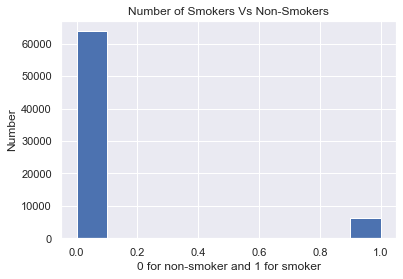

In [253]:
# to check the number of smokers Vs non smokers
display("The number of smokers and non-smokers : o for non-somekr and 1 for smokers",df.smoke.value_counts())

plt.hist(df.smoke)
plt.title("Number of Smokers Vs Non-Smokers")
plt.xlabel("0 for non-smoker and 1 for smoker")
plt.ylabel("Number")

**Here, we can observe that the number of smokers is much lower than that of non-smokers. Specifically, the number of smokers is approximately 10% of the number of non-smokers.**

In [254]:
# I want to check the AVG Cholestrol when the person is smoker Vs non-smoker
# df[['smoke','cholesterol']].groupby('smoke').agg(['sum', 'mean', 'max','min'])
display(df[['smoke','cholesterol']].groupby('smoke').mean())

display("As indicated , when the person is smoker the average Cholestrol is 1.39 which is higher than non-smokers")


,cholesterol
smoke,
0,1.364682
1,1.389528


'As indicated , when the person is smoker the average Cholestrol is 1.39 which is higher than non-smokers'

**As indicated, smokers have an average cholesterol level of 1.39, which is higher than that of non-smokers**

The number of Females=1 Vs number of Males=2 


1    45530
2    24470
Name: gender, dtype: int64

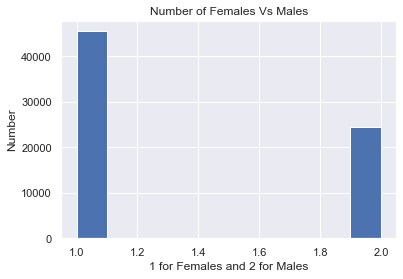

In [255]:
# check the number of males and females , 1 = female & 2 = males
plt.hist(df.gender)
plt.title("Number of Females Vs Males")
plt.xlabel("1 for Females and 2 for Males")
plt.ylabel("Number")

plt.savefig('Plot_females_Males_count.png')

print("The number of Females=1 Vs number of Males=2 ")
df.gender.value_counts()

In [256]:
# check the average of weight when gender is male or female
display(df[["gender","weight"]].groupby(["gender"]).mean())

print("As indicated , when the gender is male ,average of weight is 77.26 compared to 72.56 which is for females")

,weight
gender,
1,72.565605
2,77.257307


As indicated , when the gender is male ,average of weight is 77.26 compared to 72.56 which is for females


**We can see the males have an average weight of 77.26, compared to 72.56 for females**

In [257]:
# check the correlations between the predictors 
df1=df.drop(df.columns[[-1]],axis=1)# drop the response variable
df1.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476


**In the above plot we see the correlation between the predictors. Predictors are not highly correlated with each other.**

### In this part , I am going to create dummy variable for categorical predictors. 1st I need to change the type of variables to category and then make the dummies.

In [260]:
# create dummy variable for predictors with multiple categories

# create dummy for gender
df['men'] = np.where(df['gender']==2, 1, 0)
df['women'] = np.where(df['gender']==1, 1, 0)

# create dummy for cholesterol
df['norm_chol'] = np.where(df['cholesterol']==1, 1, 0)
df['abv_norm_chol'] = np.where(df['cholesterol']==2, 1, 0)
df['wellabv_norm_chol'] = np.where(df['cholesterol']==3, 1, 0)

# create dummy for gluc
df['norm_gluc'] = np.where(df['gluc']==1, 1, 0)
df['abv_norm_gluc'] = np.where(df['gluc']==2, 1, 0)
df['wellabv_norm_gluc'] = np.where(df['gluc']==3, 1, 0)

# create dummy for smoke
df['smoker'] = np.where(df['smoke']==1, 1, 0)
df['non_smoker'] = np.where(df['smoke']==0, 1, 0)


# create dummy for alco
df['alcoholic'] = np.where(df['alco']==1, 1, 0)
df['non_alcoholic'] = np.where(df['alco']==0, 1, 0)

# create dummy for active
df['Active'] = np.where(df['active']==1, 1, 0)
df['non_active'] = np.where(df['active']==0, 1, 0)

# drop the original variables. Since, we already made the dummy variables.We no longer need the original ones.
df=df.drop(df.columns[[1,6,7,8,9,10]],axis=1)


In [262]:
# show the current dataframe after. making dummies
df

,age,height,weight,ap_hi,ap_lo,cardio,men,women,norm_chol,abv_norm_chol,wellabv_norm_chol,norm_gluc,abv_norm_gluc,wellabv_norm_gluc,smoker,non_smoker,alcoholic,non_alcoholic,Active,non_active
0,18393,168,62.0,110,80,no,1,0,1,0,0,1,0,0,0,1,0,1,1,0
1,20228,156,85.0,140,90,yes,0,1,0,0,1,1,0,0,0,1,0,1,1,0
2,18857,165,64.0,130,70,yes,0,1,0,0,1,1,0,0,0,1,0,1,0,1
3,17623,169,82.0,150,100,yes,1,0,1,0,0,1,0,0,0,1,0,1,1,0
4,17474,156,56.0,100,60,no,0,1,1,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,168,76.0,120,80,no,1,0,1,0,0,1,0,0,1,0,0,1,1,0
69996,22601,158,126.0,140,90,yes,0,1,0,1,0,0,1,0,0,1,0,1,1,0
69997,19066,183,105.0,180,90,yes,1,0,0,0,1,1,0,0,0,1,1,0,0,1
69998,22431,163,72.0,135,80,yes,0,1,1,0,0,0,1,0,0,1,0,1,0,1


# Partition the dataset and defining predictor and response variable

In [264]:
# Split the dataset , 30 % for test data
# Response variable is cardio
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop("cardio", axis=1),df.cardio, test_size=0.30,random_state=0)

print("shape of input - training set", Xtrain.shape)
print("shape of output - training set", Ytrain.shape)
print("shape of input - testing set", Xtest.shape)
print("shape of output - testing set", Ytest.shape)


shape of input - training set (49000, 19)
shape of output - training set (49000,)
shape of input - testing set (21000, 19)
shape of output - testing set (21000,)


# 1-Fit the decision Tree model

## 1- Decision Tree with Gini criterion

In [349]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(Xtrain, Ytrain)

# do the prediction
y_pred_gini = clf_gini.predict(Xtest)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Decision Tree model Accuracy:",metrics.accuracy_score(Ytest, y_pred_gini))

# Decision Tree classifer F score
display("The Gini decision tree f1 score:",f1_score(Ytest, y_pred_gini, average='macro'))

Decision Tree model Accuracy: 0.7268571428571429


'The Gini decision tree f1 score:'

0.7260583289443445

### Visualize the Decsion Tree

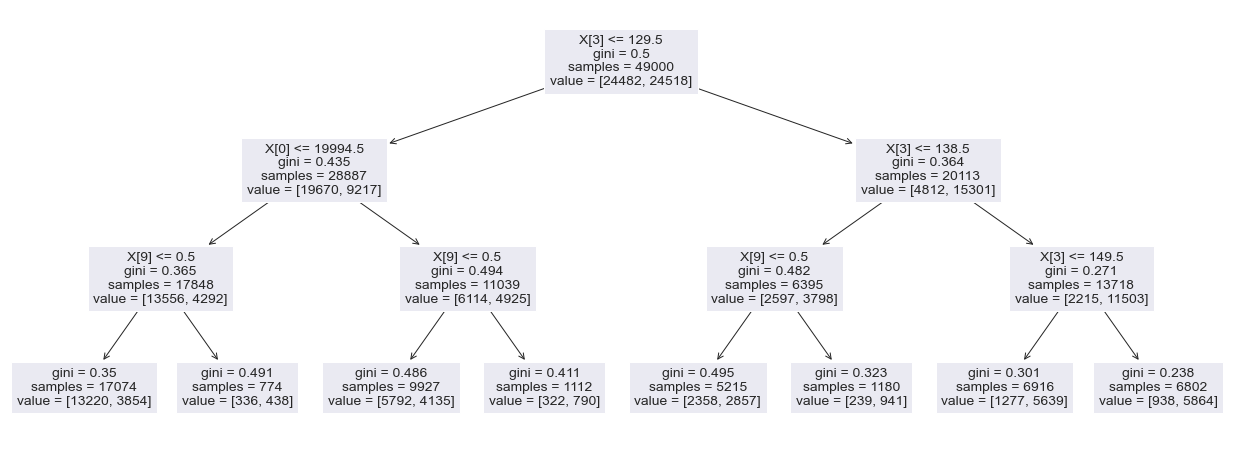

In [351]:
plt.figure(figsize=(22,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(Xtrain, Ytrain)) 

plt.savefig("treeplot.png")

## 2- Decision Tree with entropy criterion

In [319]:
# Create Decision Tree classifer object
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4,random_state=0)

# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(Xtrain,Ytrain)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict(Xtest)

# Model Accuracy, how often is the classifier correct?
print("Entropy Decision Tree model Accuracy:",metrics.accuracy_score(Ytest, y_pred_entropy))

decision_tree_accuracy=metrics.accuracy_score(Ytest, y_pred_entropy)
# Decision Tree classifer F score
display("The Entropy decision tree f1 score:",f1_score(Ytest, y_pred_entropy, average='macro'))

Entropy Decision Tree model Accuracy: 0.7304761904761905


'The Entropy decision tree f1 score:'

0.7303556539505606

#### As indicated , the  accuracy of decsion tree (criterion:entropy) is equal to = 0.730


## Classification Report

In [320]:
from sklearn.metrics import classification_report

print(classification_report(Ytest, y_pred_entropy))

              precision    recall  f1-score   support

          no       0.72      0.75      0.74     10539
         yes       0.74      0.71      0.72     10461

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



# 2- Fit the KNN model with different k

In [296]:
# create the knn classifier, n=10
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(Xtrain, Ytrain)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
#knn_accuracy
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred))

Accuracy: 0.6983333333333334


In [299]:
# create the knn classifier, n=20
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

#Train the model using the training sets
knn.fit(Xtrain, Ytrain)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
#knn_accuracy
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred))

Accuracy: 0.7094285714285714


In [300]:
# create the knn classifier, n=25
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(Xtrain, Ytrain)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
#knn_accuracy
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred))

Accuracy: 0.6912380952380952


In [301]:
# create the knn classifier, n=22
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(Xtrain, Ytrain)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
#knn_accuracy
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred))

Accuracy: 0.6912380952380952


In [302]:
# create the knn classifier, n=18
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(Xtrain, Ytrain)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
#knn_accuracy
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred))

Accuracy: 0.707047619047619


#### After checking differnet values for K, we consider the K=20 as the number of nearest neighbors.Since it gave us the highest accuracy.

In [322]:
# create the knn classifier, n=20
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

#Train the model using the training sets
knn.fit(Xtrain, Ytrain)

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
#knn_accuracy
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

knn_accuracy=metrics.accuracy_score(Ytest, y_pred)
# Classification report
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

          no       0.68      0.79      0.73     10539
         yes       0.75      0.63      0.68     10461

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



# 3- Fit the Random Forest model

In [323]:
# To model the Random Forest Model classifier
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(Xtrain,Ytrain)

# prediction
y_pred=clf_rf.predict(Xtest)

# Model Accuracy, how often is the classifier correct?
print("Random Forest Model model Accuracy:",metrics.accuracy_score(Ytest, y_pred))

RF_accuracy=metrics.accuracy_score(Ytest, y_pred)
# Classification report
print(classification_report(Ytest, y_pred))

Random Forest Model model Accuracy: 0.711047619047619
              precision    recall  f1-score   support

          no       0.71      0.73      0.72     10539
         yes       0.72      0.69      0.71     10461

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



# 4- Fit the Gaussian Navie Bayes model

In [324]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf_ga = GaussianNB()
clf_ga.fit(Xtrain, Ytrain)
target_pred_GN = clf_ga.predict(Xtest)
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Ytest, target_pred_GN, normalize = True)
print("Gaussian Navie Bayes classifier Accuracy:",accuracy)

Gaussian_Navie_Bayes_Accuracy=accuracy

# Classification report
print(classification_report(Ytest, target_pred_GN))


Gaussian Navie Bayes classifier Accuracy: 0.5974285714285714
              precision    recall  f1-score   support

          no       0.57      0.82      0.67     10539
         yes       0.67      0.37      0.48     10461

    accuracy                           0.60     21000
   macro avg       0.62      0.60      0.58     21000
weighted avg       0.62      0.60      0.58     21000



# Comparing Models' accuracy

In [332]:

details = { 'Model Names': ['Gaussian Navie Bayes', 'KNN','Random Forest','Decision Tree'], 
                'Accuracy': [Gaussian_Navie_Bayes_Accuracy, knn_accuracy, RF_accuracy,decision_tree_accuracy]}
df_accuracy = pd.DataFrame(details)
df_accuracy

,Model Names,Accuracy
0,Gaussian Navie Bayes,0.597429
1,KNN,0.709429
2,Random Forest,0.711048
3,Decision Tree,0.730476


### We developed four models in our analysis: decision tree, KNN, random forest, and Gaussian Naive Bayes. The results show that the decision tree model had the highest accuracy. Furthermore, the decision tree analysis revealed that the most important factors associated with vascular diseases are systolic blood pressure, age, and cholesterol. Therefore, it is strongly advised to monitor and control these significant risk factors in order to reduce the risk of developing vascular diseases.

**reference: credit for Kaggle Website: https://www.kaggle.com/sulianova/cardiovascular-**